# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


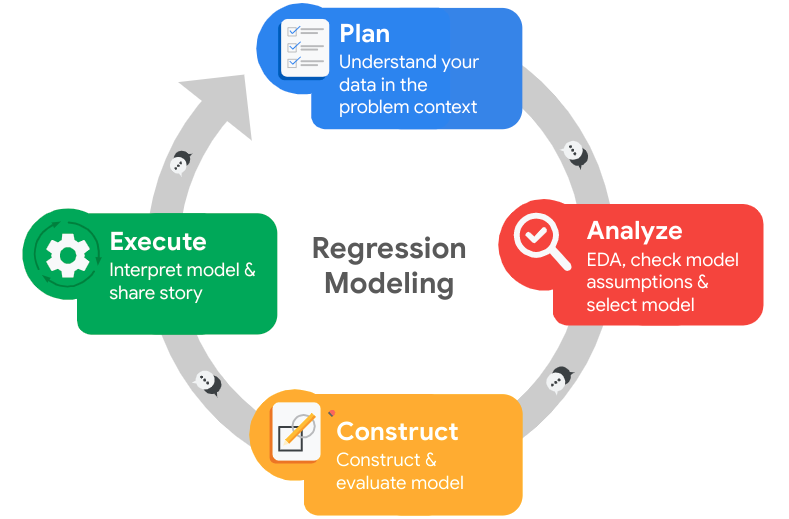

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [51]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to save trained model (and load later)
import pickle


# add others here once models have been chosen to try
from sklearn.model_selection import train_test_split

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


There is no missing data.

### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


Some things already stick out:
- The most common salary classificatioin is low, consisting of almost half of the surveyed employees.
- Considering a commonly accepted average of 40 hours per week times 4 weeks in a month giving 160 hours typically worked by many Americans, a median of 200 and maximum of over 300 may be very important.
- 23.8% of employees surveyed left, which explains this need for further analysis to help arrive at a solution.
- The maximum time an employee has been employed by Salifort Motors is 10 years. Assuming that is the age of the company, the mean number of years at the company is about a third of that amount.
- Only 2% of employees have received a promotion in the last 5 years. 

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
df0.rename(columns={'satisfaction_level':'satisfaction', 'last_evaluation':'last_eval', 'number_project':'num_projects',
       'average_montly_hours':'avg_monthly_hrs', 'time_spend_company':'yrs_employed', 'Work_accident':'accident',
       'promotion_last_5years':'promoted_last5yrs', 'Department':'dept'}, inplace=True)

# Display all column names after the update
df0.columns

Index(['satisfaction', 'last_eval', 'num_projects', 'avg_monthly_hrs',
       'yrs_employed', 'accident', 'left', 'promoted_last5yrs', 'dept',
       'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
df0.isna().any().sum()

0

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
df0[df0.duplicated()]

,satisfaction,last_eval,num_projects,avg_monthly_hrs,yrs_employed,accident,left,promoted_last5yrs,dept,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


How likely is it that these are legitimate entries? In other words, how plausible is it that two employees self-reported the exact same response for every column?

You could perform a likelihood analysis by essentially applying Bayes' theorem and multiplying the probabilities of finding each value in each column, but this does not seem necessary. With several continuous variables across 10 columns, it seems very unlikely that these observations are legitimate. You can proceed by dropping them.

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')
print(df1.shape[0])
print(df0.shape[0] - 3008)

11991
11991


### Check outliers

Check for outliers in the data.

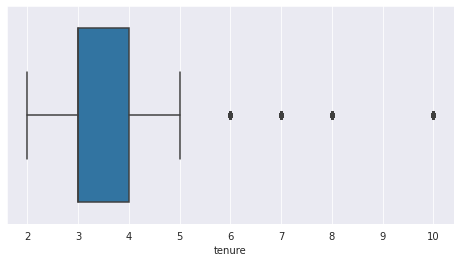

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
df1.rename(columns={'yrs_employed':'tenure'}, inplace=True)
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
sns.boxplot(x='tenure', data=df1);

In [12]:
# Determine the number of rows containing outliers
len(df1[df1.tenure >= 6])


824

In [13]:
print(f'{round(len(df1[df1.tenure >= 6]) / len(df1) * 100,1)}% outliers in `tenure`')

6.9% outliers in `tenure`


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed
df1.left.value_counts()


0    10000
1     1991
Name: left, dtype: int64

In [15]:
# Get percentages of people who left vs. stayed
df1.left.value_counts(normalize=True)

0    0.833959
1    0.166041
Name: left, dtype: float64

Based on that proportion, I *may* want to stratify train test split.

### Data visualizations

In [16]:
df1.head()

,satisfaction,last_eval,num_projects,avg_monthly_hrs,tenure,accident,left,promoted_last5yrs,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Now, examine variables and create plots to visualize relationships between variables in the data.

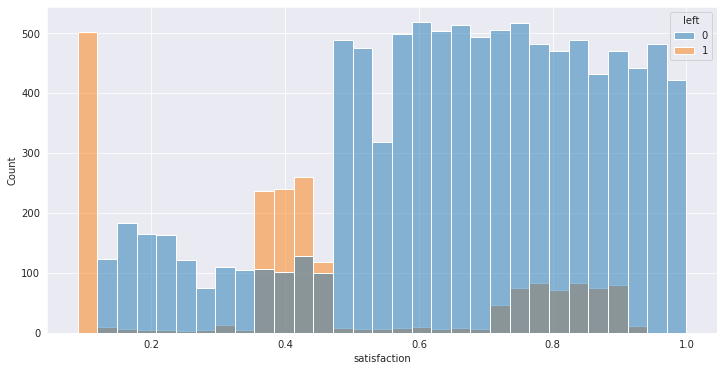

In [17]:
plt.figure(figsize=(12,6))
sns.histplot(x='satisfaction', data=df1, hue='left');

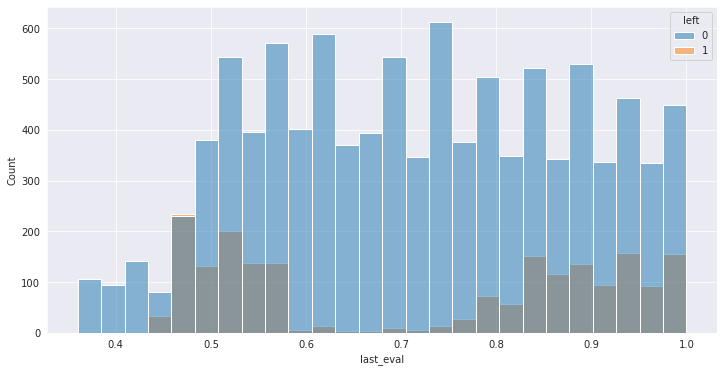

In [18]:
plt.figure(figsize=(12,6))
sns.histplot(x='last_eval', data=df1, hue='left');

There is a curious tri- or bi- modal nature to the distribution of employees who have left. The surprising portion of employees who left are those whose satisfaction is above 0.7 and the same with the employee's evaluation.

What is the correlation between employees who left and those who were promoted in the last 5 years?

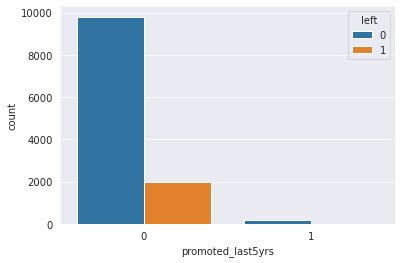

In [19]:
sns.countplot(x='promoted_last5yrs', data=df1, hue='left');

It looks like promoted employees never leave.

In [20]:

df1.groupby(['promoted_last5yrs','left'])[['left']].count()

left
promoted_last5yrs left      
0                 0     9805
                  1     1983
1                 0      195
                  1        8

In [23]:
left0, left1 = df1['promoted_last5yrs'].value_counts()
print(left0, left1)

11788 203


In [24]:
stayed_nopromo, left_nopromo, stayed_promo, left_promo = df1[['promoted_last5yrs','left']].value_counts()
left_promo

8

In [25]:
nopromo = stayed_nopromo + left_nopromo
promo = stayed_promo + left_promo

In [26]:
print(f'Percentage of employees who left after not being promoted is {round(left_nopromo/nopromo*100)}%')
print(f'Percentage of employees who left after being promoted is {round(left_promo/promo*100)}%')

Percentage of employees who left after not being promoted is 17%
Percentage of employees who left after being promoted is 4%


Being promoted does seem to be a deterrent from leaving, but it will not prevent it.

Let's look at tenure and average monthly hours as related to each other and as related to leaving.

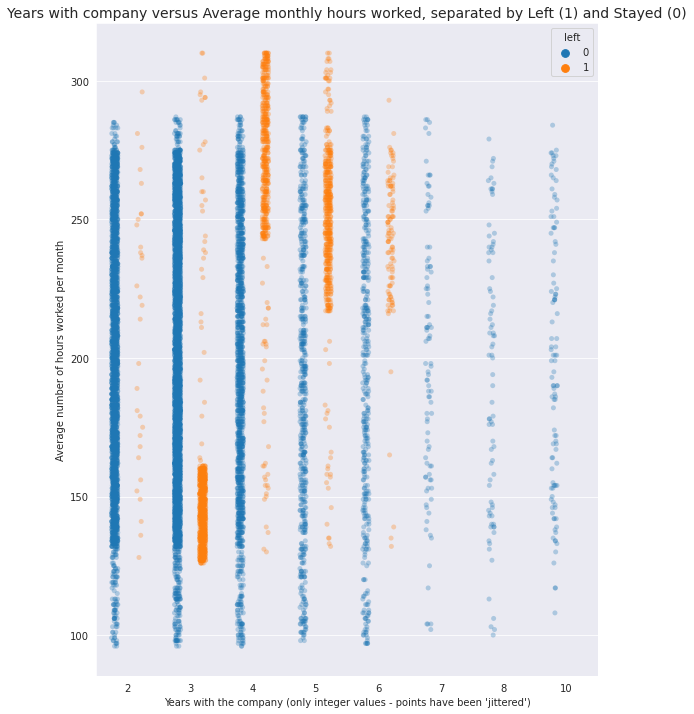

In [27]:
plt.figure(figsize=(9, 12))
sns.stripplot(y='avg_monthly_hrs', x='tenure', data=df1, hue='left', alpha=0.3, dodge=True)
plt.title('Years with company versus Average monthly hours worked, separated by Left (1) and Stayed (0)', fontsize=14)
plt.xlabel("Years with the company (only integer values - points have been 'jittered')")
plt.ylabel("Average number of hours worked per month");
# without dodge, it is impossible to see all who left behind thick clusters of those who didn't

It looks like employees with low tenure will leave regardless of workload (if not more likely to leave with lower workloads).  However, the longer an employee has been with Salifort Motors, the more likely they seem to leave if their average hours worked per month exceeds around 220 hours.

I'm adding some more visuals here that I got from the exemplar.  *The next marked portion of cells are not my independent work.*

### From the exemplar with minor changes

Start by creating a stacked boxplot showing `average_monthly_hours` distributions for `number_project`, comparing the distributions of employees who stayed versus those who left.

Box plots are very useful in visualizing distributions within data, but they can be deceiving without the context of how big the sample sizes that they represent are. So, we could also plot a stacked histogram to visualize the distribution of `number_project` for those who stayed and those who left.

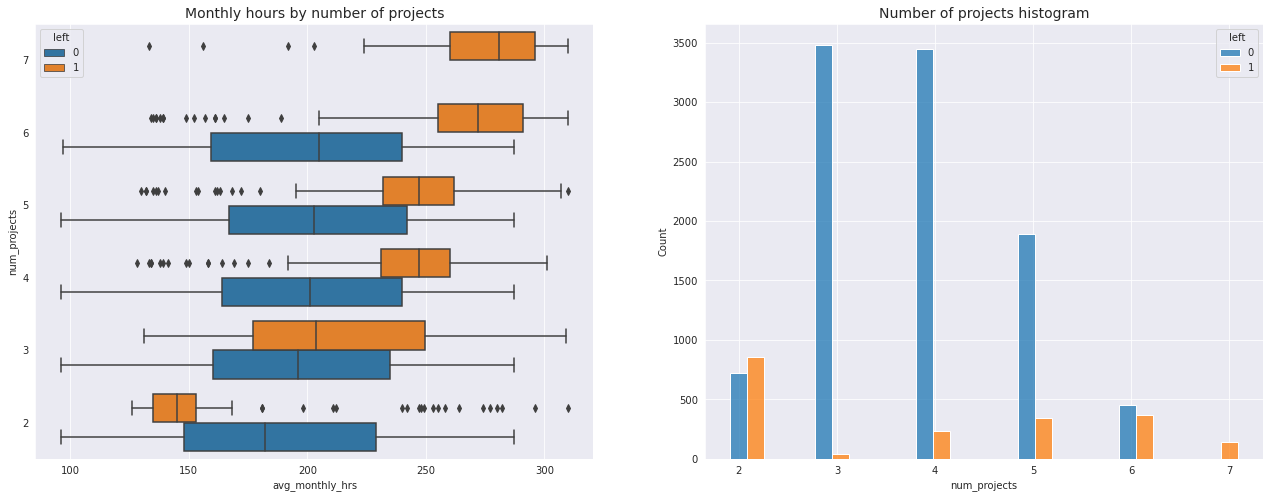

In [28]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='avg_monthly_hrs', y='num_projects', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['num_projects']
tenure_left = df1[df1['left']==1]['num_projects']
sns.histplot(data=df1, x='num_projects', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

1. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects. 

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255&ndash;295 hours/month&mdash;much more than any other group. 

3. The optimal number of projects for employees to work on seems to be 3&ndash;4. The ratio of left/stayed is very small for these cohorts.

4. If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerably more hours than this. It seems that employees here are overworked.

As the next step, try to confirm that all employees with seven projects left.

In [29]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['num_projects']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

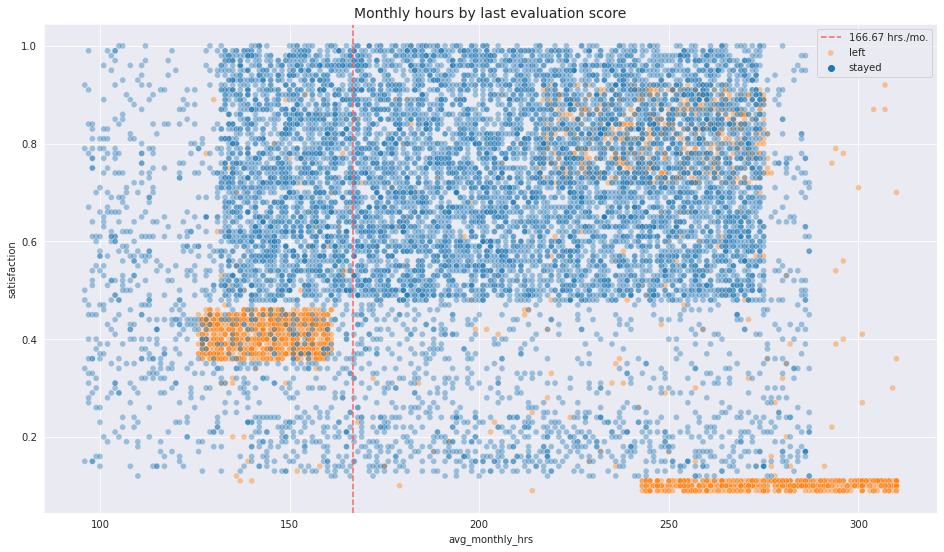

In [30]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='avg_monthly_hrs', y='satisfaction', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The scatterplot above shows that there was a sizeable group of employees who worked ~240&ndash;315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero. 

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels. 

Finally, there is a group who worked ~210&ndash;280 hours per month, and they had satisfaction levels ranging ~0.7&ndash;0.9. 

Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data. 

For the next visualization, it might be interesting to visualize satisfaction levels by tenure.

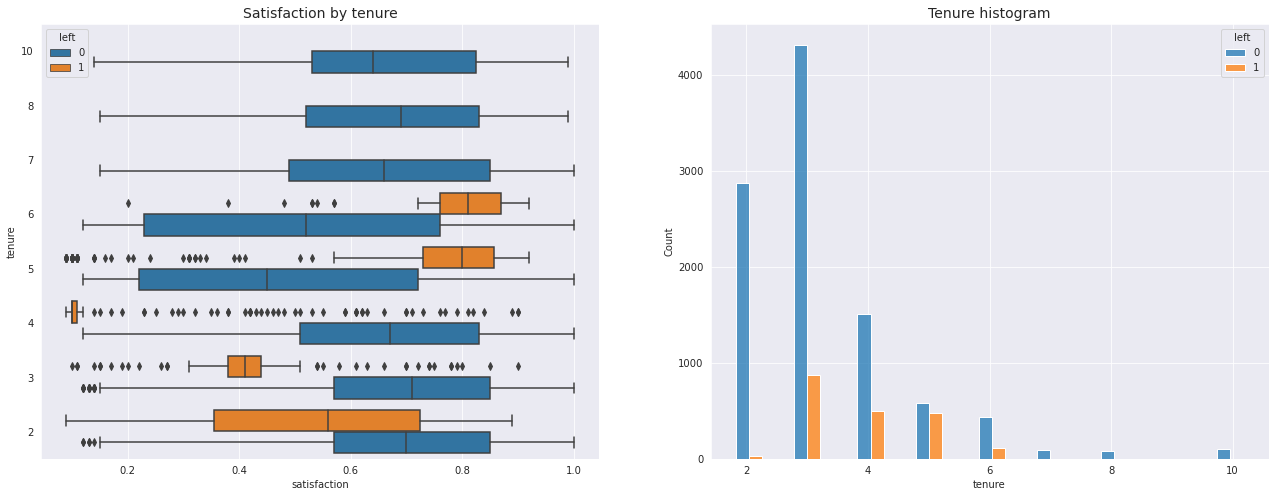

In [39]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
# tenure_stay = df1[df1['left']==0]['tenure']
# tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

There are many observations you could make from this plot.
- Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
- Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible. 
- The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed. 
- The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

As the next step in analyzing the data, calculate the mean and median satisfaction scores of employees who left and those who didn't.

In [40]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left. 

Next, examine salary levels for different tenures.

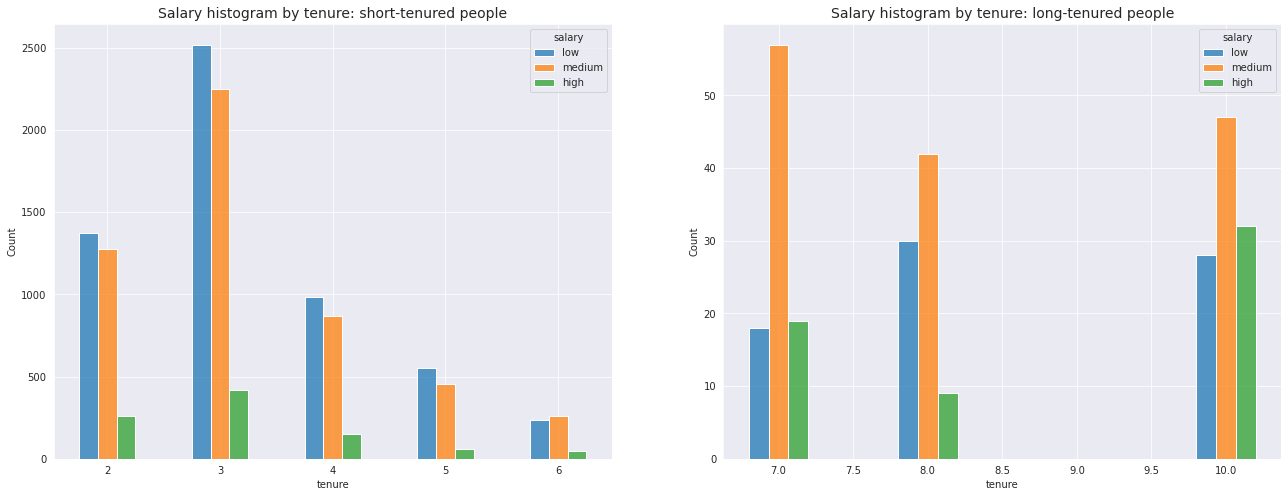

In [41]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] <= 6]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] >= 7]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees. 

Next, explore whether there's a correlation between working long hours and receiving high evaluation scores using a scatterplot of `average_monthly_hours` versus `last_evaluation`.

In [42]:
df1.columns

Index(['satisfaction', 'last_eval', 'num_projects', 'avg_monthly_hrs',
       'tenure', 'accident', 'left', 'promoted_last5yrs', 'dept', 'salary'],
      dtype='object')

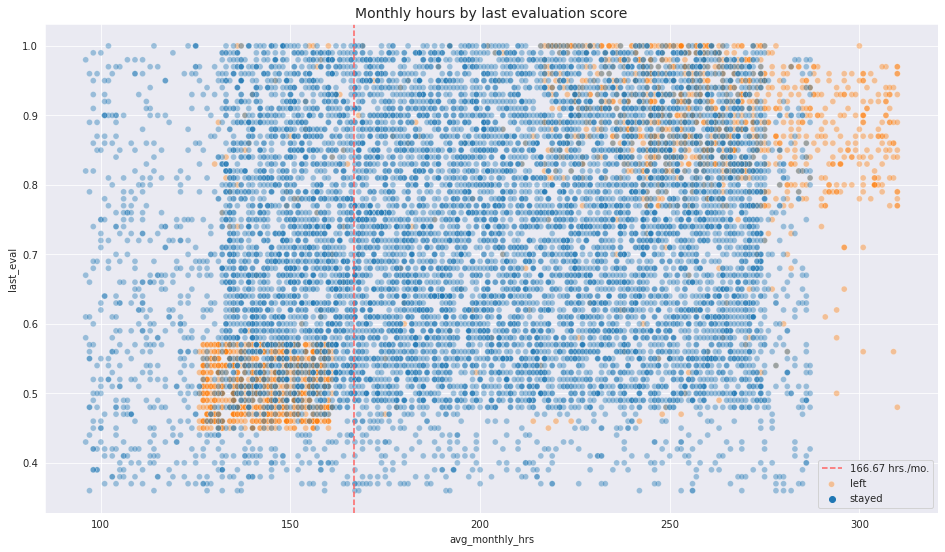

In [43]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='avg_monthly_hrs', y='last_eval', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The following observations can be made from the scatterplot above:
- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores. 
- There seems to be a correlation between hours worked and evaluation score. 
- There isn't a high percentage of employees in the upper left quadrant of this plot, but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

Next, examine whether employees who worked very long hours were promoted in the last five years.

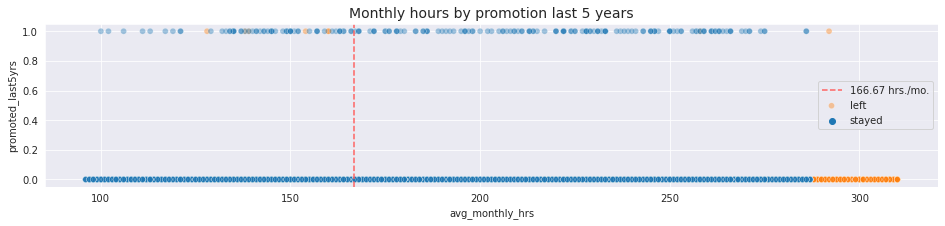

In [44]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='avg_monthly_hrs', y='promoted_last5yrs', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

The plot above shows the following:
- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours  

Next, inspect how the employees who left are distributed across departments.

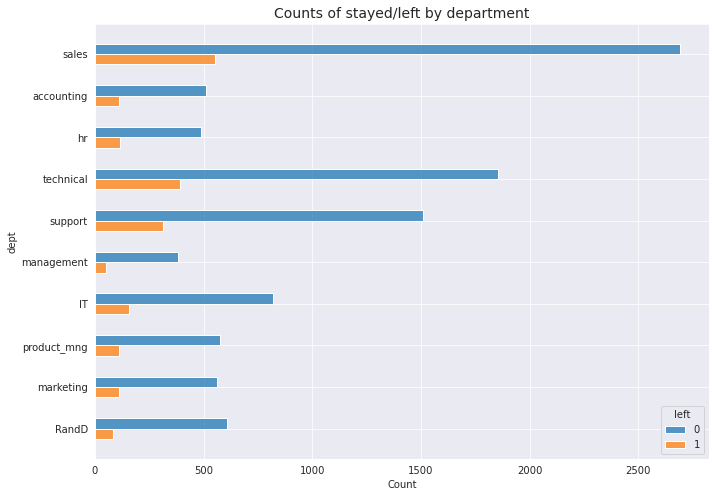

In [45]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df1, y='dept', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.title('Counts of stayed/left by department', fontsize=14);

There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed. 

Lastly, let's check for strong correlations between variables in the data.

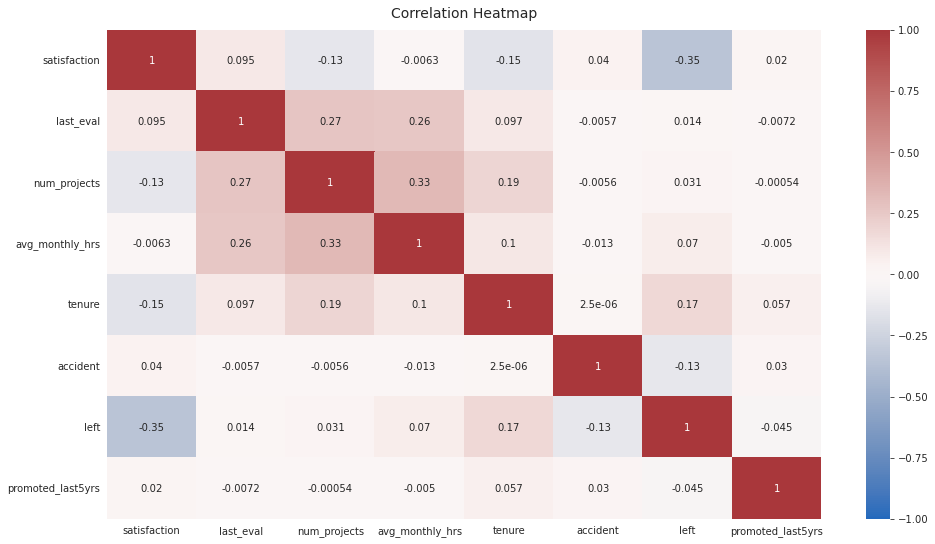

In [38]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### Insights

All insights gathered from EDA were shared above as observations were made.

Additional insights from the exemplar:<br>
It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave. 

### Back to my original work

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

### Identify the types of models most appropriate for this task.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [46]:
df1.head()

,satisfaction,last_eval,num_projects,avg_monthly_hrs,tenure,accident,left,promoted_last5yrs,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


For my first model, I will drop department before creating dummies for salary, since there seemed to be no correlation between department and whether or not an employee left.

My first model will be logistic regression.  After that I will try a Random Forest and some type of boosting algorithm.

In [47]:
# Should I stratify the split
df1.left.value_counts(normalize=True)

0    0.833959
1    0.166041
Name: left, dtype: float64

In [48]:
# prepare data for splitting
y = df1['left']
X = df1.drop(['left','dept'], axis=1)
X = pd.get_dummies(X)
X.head()

,satisfaction,last_eval,num_projects,avg_monthly_hrs,tenure,accident,promoted_last5yrs,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,1,0


I may want to rethink using dummies on salary and perhaps change low to 1, medium to 2, and high to 3. <br>
I could also keep department and use dummies on that.

Since neither logistic regression nor decision trees are helped by scaling, I will begin by splitting the data as is at this point.

Actually, with the multicollinearity between several of the features (as seen above in the heatmap), the likelihood of a binomial logistic regression model will produce the observed data is not high.

Therefore I will use decision trees.

In [49]:
X.shape

(11991, 10)

I'll start with a simple single tree.

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [54]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Since decision trees can be prone to overfitting, I will save some of the data as a holdout set.

In [55]:
# split the data again, and for the model building and first evaluation, only use train and validation sets (save the test set)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.2, stratify=y_train, random_state=42)

In [56]:
# instantiate a simple model and fit it
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_tr, y_tr)
dt_preds = dt.predict(X_val)

In [122]:
# define a function to accumulate scores
def get_scores(model_name, test_data, predictions):
    acc = accuracy_score(test_data, predictions)
    prec = precision_score(test_data, predictions)
    rec = recall_score(test_data, predictions)
    f1 = f1_score(test_data, predictions)
    scores_dict = {'model' : model_name, 
                    'Accuracy' : acc, 
                    'Precision' : prec, 
                    'Recall' : rec,
                    'F1' : f1}
    return scores_dict

In [146]:
# Keep track of scores starting now
score_dict = get_scores('Decision Tree', y_val, dt_preds)
score_df = pd.DataFrame.from_dict(score_dict, orient='index').T

In [147]:
score_df

,model,Accuracy,Precision,Recall,F1
0,Decision Tree,0.968734,0.896024,0.918495,0.907121


With an imbalanced dataset, we are more concerned with the likelihood of making a false positive prediction or false negative (i.e. predicting the employee will leave when they wouldn't have, or predicting an employee will stay when they won't). Therefore, the high accuracy isn't as important as the still good (but not as good) precision and recall.

We can get a better idea of those with a confusion matrix.

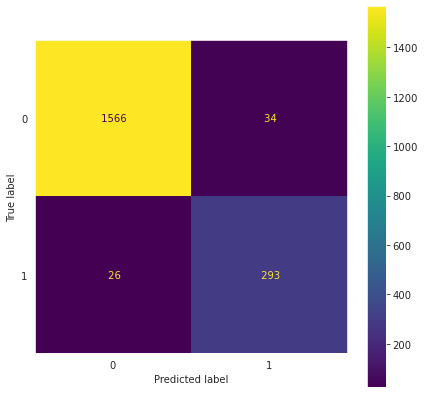

In [77]:
# create and display a confusion matrix
# plt.grid(False)
fig, _ = plt.subplots(nrows=1, figsize=(7,7))
ax = plt.subplot(1, 1, 1)
ax.grid(False)

cm = confusion_matrix(y_val, dt_preds)
disp = ConfusionMatrixDisplay(cm, display_labels=dt.classes_)
disp.plot(values_format=' ', ax=ax);

From this matrix we can see that there is more of a chance in predicting an employee will stay when they will in fact leave.  The probability of predicting an employee will leave when they will in fact stay is much lower.  Since our goal is to identify employees that will leave, it would be beneficial to try to find a better model.

We could fine tune one tree, but why not go straight to tuning a RandomForest. :)

Since I will be using cross validation, I want to be sure all trees in the optimal forest train on the same set of train and validation data.

In [93]:
from sklearn.model_selection import PredefinedSplit, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [100]:
split_index = [0 if x in X_val.index else -1 for x in X_train.index]


In [104]:
custom_split = PredefinedSplit(split_index)

In [105]:
# instantiate the model, choose parameters and scores to report, and create a Grid Search object for the model
rf = RandomForestClassifier(random_state=0)
cv_params = {'max_depth' : [3,5,None],
             'min_samples_leaf' : [1,2,3],
             'min_samples_split' : [2,3,4],
             'max_features' : [1.0],
             'max_samples' : [0.7,1.0],
             'n_estimators' : [150, 250, 400]}
scoring = {'accuracy','precision','recall','f1'}
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=custom_split, refit='f1', n_jobs = -1, verbose = 1)

In [106]:
%%time
rf_cv.fit(X_train, y_train)

Fitting 1 folds for each of 162 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 159 out of 162 | elapsed:  1.1min remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  1.1min finished


CPU times: user 2.05 s, sys: 64.1 ms, total: 2.11 s
Wall time: 1min 9s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0, -1])),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weigh...
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_

In [107]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [109]:
# this path is to work with Coursera lab notebook
# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

In case I lose my connection, I don't want to have to refit my model.

In [110]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [111]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [113]:
# Write pickle
write_pickle(path, rf_cv, 'hr_rf1')

In [114]:
# Use this if necessary
# Read pickle
# rf_cv = read_pickle(path, 'hr_rf1')

In [115]:
rf_cv.best_score_

0.945337620578778

In [118]:
# make a random forest model with the best parameters
rf = RandomForestClassifier(max_depth= None,
                             max_features= 1.0,
                             max_samples= 0.7,
                             min_samples_leaf= 1,
                             min_samples_split= 2,
                             n_estimators= 150,
                             random_state=0)

In [119]:
rf.fit(X_train, y_train) # this time we won't lose any data to a fold

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=1.0,
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [128]:
rf_preds = rf.predict(X_tr)
all_scores

""


In [151]:
score_dict = get_scores('Random Forest', y_tr, rf_preds)
score_dict.values()

dict_values(['Random Forest', 0.9960901863677831, 0.9968051118210862, 0.9795918367346939, 0.98812351543943])

In [153]:
score_df.loc[len(score_df)] = score_dict.values()
score_df

,model,Accuracy,Precision,Recall,F1
0,Decision Tree,0.968734,0.896024,0.918495,0.907121
1,Random Forest,0.99609,0.996805,0.979592,0.988124


The Random Forest Recal and F1 scores are very good, so we will now use this model to predict the results of the test set.

In [154]:
test_preds = rf.predict(X_test)

In [155]:
score_dict = get_scores('Random Forest Test', y_test, test_preds)

In [156]:
score_df.loc[len(score_df)] = score_dict.values()
score_df

,model,Accuracy,Precision,Recall,F1
0,Decision Tree,0.968734,0.896024,0.918495,0.907121
1,Random Forest,0.99609,0.996805,0.979592,0.988124
2,Random Forest Test,0.985411,0.978892,0.932161,0.954955


✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






Our random forest did slightly worse on the test data, but still did very well.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



We can look at the confusion matrix for our Random Forest model.

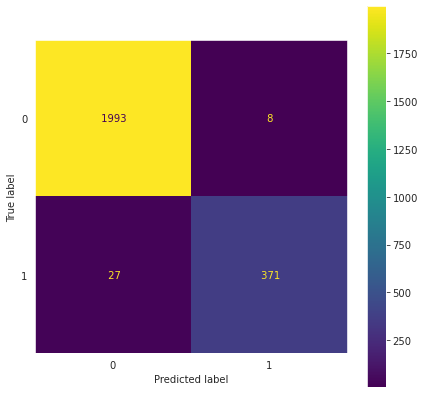

In [159]:
fig, _ = plt.subplots(nrows=1, figsize=(7,7))
ax = plt.subplot(1, 1, 1)
ax.grid(False)

cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(cm, display_labels=rf.classes_)
disp.plot(values_format=' ', ax=ax);

This still shows 27 of those who left to be predicted to stay, but out of 398, that is a *much* lower percentage.  And as far as predicting employees will leave when they will not, that is an extremely low percent.

To see what influenced the tree the most, let's look at the first few levels of it.

In [160]:
from sklearn.tree import plot_tree

In [169]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=1.0,
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

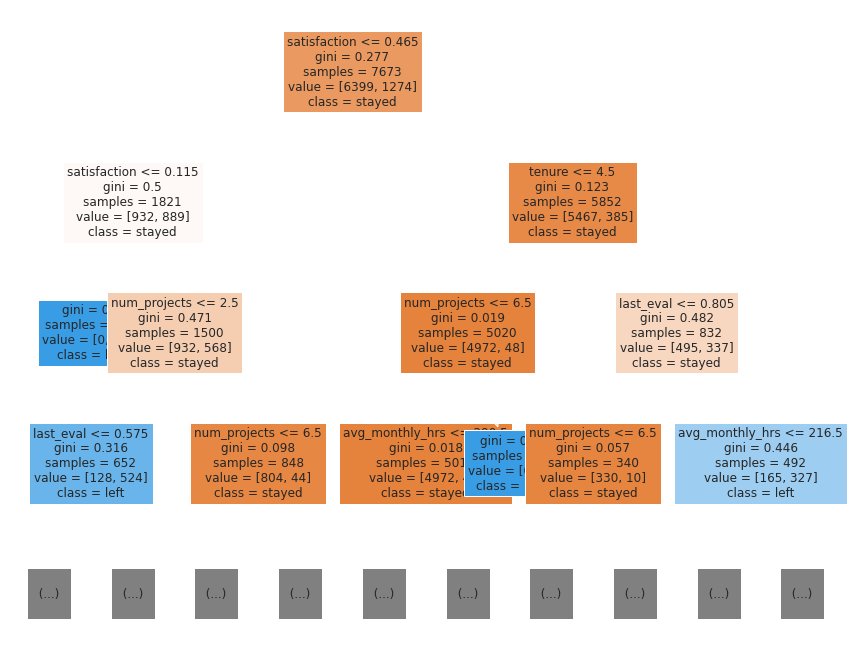

In [176]:
plt.figure(figsize=(15,12))
plot_tree(dt, max_depth=3, fontsize=12, feature_names=X.columns, class_names={0:'stayed', 1:'left'}, filled=True)
plt.show();

This shows that the first split was made based on satisfaction level. <br>
It would be worth creating another model without this feature present.

Finally, we can look at feature importance as a bar graph.

In [178]:
feature_imp = pd.Series(rf.feature_importances_, index=X_train.columns)

In [182]:
feature_imp.sort_values(inplace=True)

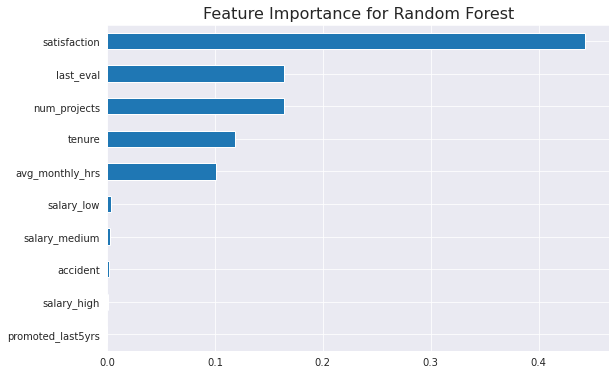

In [186]:
plt.figure(figsize=(9,6))
feature_imp.plot(kind='barh')
plt.title("Feature Importance for Random Forest", fontsize=16);

💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



### Summary of model results


### Conclusion, Recommendations, Next Steps


These questions will now be addressed in my executive summary.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.